# Courbes de niveau

par *Laure Bourguelle et Marguerite Dejean de La Bâtie*

In [8]:

# Préambule

#Autograd & Numpy
import autograd
import autograd.numpy as np

#Pandas
import pandas as pd

#Matplotlib
import matplotlib as mpl
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [10, 10] #[width, height] (inches). 

#Jupyter & IPython
from IPython.display import display



In [9]:
def grad(f):
    """Calcul du gradient de f (retourne une fonction qui renvoie un np.array de dimension 2)"""
    g = autograd.grad
    def grad_f(x, y):
        return np.array([g(f, 0)(x, y), g(f, 1)(x, y)])
    return grad_f

In [10]:
def J(f):
    """Calcul de la matrice jacobienne de f (retrourne une fonction qui renvoie une matrice)"""
    j = autograd.jacobian
    def J_f(x, y):
        return np.array([j(f, 0)(x, y), j(f, 1)(x, y)]).T
    return J_f

In [40]:
def f1(x1, x2):
    x1 = np.array(x1)
    x2 = np.array(x2)
    return 3.0 * x1 * x1 - 2.0 * x1 * x2 + 3.0 * x2 * x2 

**Question 1**

Soient $c \in \mathbb{R}$ et $f:\mathbb{R}^2\rightarrow \mathbb{R}$ continue telle que $f(x_1,x_2)\rightarrow +\infty$ quand $||(x_1,x_2)||\rightarrow +\infty$.

Montrons que l'ensemble de niveau $c$ de $f$ est compact.

En effet, par hypothèse, $f(x_1,x_2)\rightarrow +\infty$, c'est-à-dire que pour tout $A\in \mathbb{R}$, il existe $B\in \mathbb{R}$ tel que si $||(x_1,x_2)||>B$, alors $f(x_1,x_2)>A$.

On prend $A=c$. Il existe donc $B\in\mathbb{R}$ tel que $||(x_1,x_2)||>B$ implique $f(x_1,x_2)>c$.

L'ensemble de niveau $c$ de $f$ est donc inclus dans la boule de centre $(0,0)$ et de rayon $B$. Il s'agit donc d'un ensemble borné.

De plus, $\{x\in \mathbb{R}/f(x)=c \}$ est un ensemble fermé comme image réciproque par une fonction continue du fermé $\{c\}$.

**L'ensemble de niveau $c$ de $f$ est donc un ensemble fermé borné en dimension 1 finie, donc un compact.**

**Question 2**

aire orientée = déterminant entre (x-x0) et gradient normalisé


**Question 3**

On pose $p(x_1, x_2) := \frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|} (x_1 - x_{10}) -
\frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|} (x_2 - x_{20})$ et $g:((x_1,x_2),t) \mapsto (f(x_1,x_2)-c, t-p(x_1,x_2))$.

$g$ est continûment différentiable car ses deux fonctions composantes le sont : $f$ est continûment différentiable donc $f-c$ l'est aussi par somme et $t-p(x)$ est un polynôme en les coordonnées.

La matrice jacobienne partielle de $g$ par rapport à $x$ est donc :
$J_x(g)=\begin{pmatrix}
\partial_1 f & \partial_2 f\\
-\partial_1 p& -\partial_2 p
\end{pmatrix} =
\begin{pmatrix}
\partial_1 f & \partial_2 f\\
-\frac{\partial_2 f(x_0)}{\|\nabla f(x_0)\|}& \frac{\partial_1 f(x_0)}{\|\nabla f(x_0)\|}
\end{pmatrix}$

Or $\nabla f=\partial_{(x_1,x_2)} f$ ne s'annule pas dans un voisinage de $x_0$. La jacobienne est donc inversible sur ce voisinage.

Enfin, pour $t_0=0=p(x_0)$, $g(x_0,t_0-p(x_0))=(f(x_0)-c,0)=0$.

Donc d'après le théorème des fonctions implicites, il existe $\varepsilon >0$ et une unique fonction implicite $\gamma : ]-\varepsilon, +\varepsilon[ \rightarrow \mathbb{R}^2$ continûment différentiable telle que pour tout $x$ dans un voisinage de $x_0$ et pour tout $t\in ]-\varepsilon, +\varepsilon[$, $g(x,t)=0$ équivaut à $x = \gamma(t)$, c'est-à-dire $(f(x_1,x_2)-c, t-p(x_1,x_2))=(0,0)$ équivaut à $x=\gamma(t)$.

**Donc pour $t=p(x_1,x_2)$, $f(x_1,x_2)=c$ équivaut à $x=\gamma(t)$.**

**Question 4**

D'après le théorème des fonctions implicites dont les hypothèses ont été vérifiées à la question précédente :

Pour tout $t\in ]-\varepsilon, \varepsilon[$,

$\gamma'(t)=-J_x(g((x_1,x_2),t))^{-1}.\partial_t g((x_1,x_2),t) =
\begin{pmatrix}
\partial_1 f(x_1,x_2) & \partial_2 f(x_1,x_2)\\
-\partial_1 p(x_1,x_2)& -\partial_2 p(x_1,x_2)
\end{pmatrix}^{-1}.
\begin{pmatrix}
\partial_t (f(x_1,x_2)-c)\\
\partial_t (t-p(x_1,x_2))
\end{pmatrix}$

$=\frac{1}{det J_x(g)} \times \begin{pmatrix}
-\partial_2 p(x_1,x_2) & -\partial_2 f(x_1,x_2)\\
\partial_1 p(x_1,x_2)& \partial_1 f(x_1,x_2)
\end{pmatrix}.
\begin{pmatrix}
0\\
1
\end{pmatrix}$

$=\frac{1}{det J_x(g)} \times
\begin{pmatrix}
-\partial_2 f(x_1,x_2)\\
\partial_1 f(x_1,x_2)
\end{pmatrix} \neq 0$ d'après la question précédente.



De plus, $\nabla f(\gamma (t)) = \nabla f(x_1,x_2)$ d'après la question 3.

Or $\nabla f(x_1,x_2) =\begin{pmatrix}
\partial_1 f(x_1,x_2)\\
\partial_2 f(x_1,x_2)
\end{pmatrix}$.

Donc $<\gamma'(t)|\nabla f(\gamma (t))> = \frac{1}{det J_x(g)} \times
(-\partial_2 f(x_1,x_2),\partial_1 f(x_1,x_2)).\begin{pmatrix}
\partial_1 f(x_1,x_2)\\
\partial_2 f(x_1,x_2)
\end{pmatrix}=0$.

**Donc $\gamma'(t)$ est bien orthogonal à $\nabla f(\gamma (t))$.**


**Question 5**

Précision ?

On choisit $eps = 10^{-5}$.

On choisit un $\varepsilon$ suffisament petit pour avoir une bonne précision dans la valeur retournée. Cependant, il ne faut pas que la valeur soit trop petite si on veut obtenir un résultat en moins de $N$ étapes. De plus, un $\varepsilon$ trop petit serait inutile à cause des erreurs d'arrondis dans les calculs sur les flottants.

In [12]:
eps = 10e-5
N = 100

def F1(x,y):
    """Retourne le couple : (f1(x,y) - courbe de niveau, contrainte)"""
    return np.array([f1(x,y)-0.8, x-y])

def Newton(F, x0, y0, eps=eps, N=N):
    """Calcul grâce à la méthode de Newton d'un point de la courbe de niveau c (info contenue dans F) avec une précision de eps et en N étapes au maximum"""
    for i in range(N):
        inv_jacob = np.linalg.inv(J(F)(x0,y0))
        [a, b] = np.dot(inv_jacob, F(x0, y0))
        x,y = x0 - a, y0 - b
        if np.sqrt((x - x0)**2 + (y - y0)**2) <= eps:
            return x, y
        x0, y0 = x, y
    else:
        raise ValueError(f"no convergence in {N} steps.")

In [30]:
Newton(F1, 0.9,0.9)

(0.4472135954999586, 0.4472135954999586)

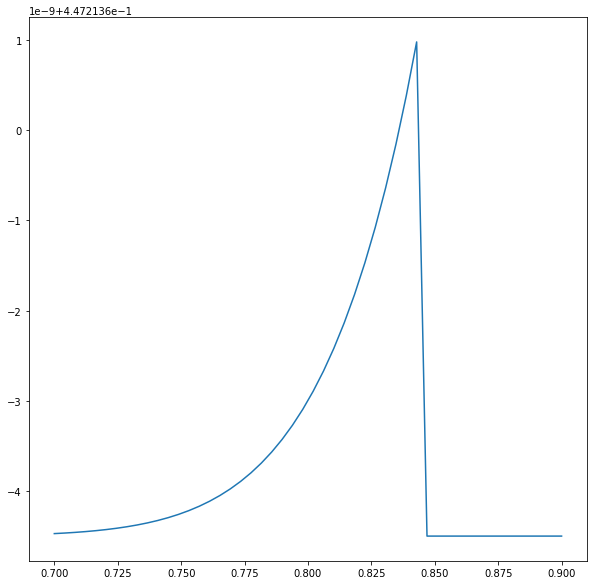

In [14]:
import matplotlib.pyplot as plt

#Variation du point initial (x0,y0) entre (0.7,0.7) et (0.9,0.9) (avec toujours x=y)

X = np.linspace(0.7,0.9,50)
Y = np.array([(Newton(F1, x, x))[0] for x in X])

plt.plot(X,Y);


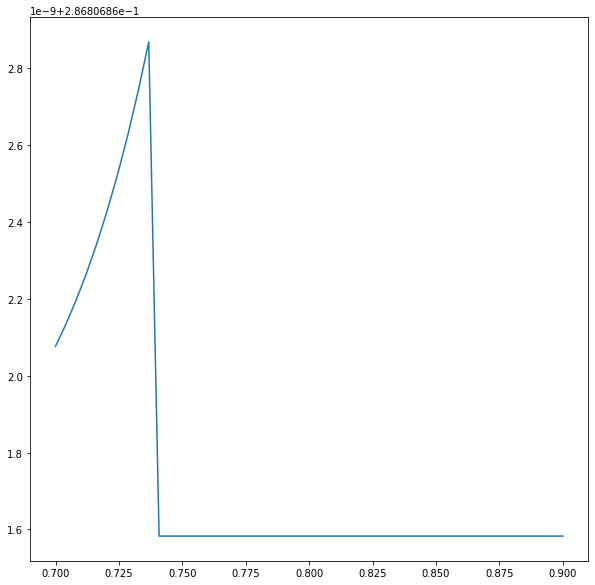

In [15]:
import matplotlib.pyplot as plt

#Changement de la contrainte : non plus x=y mais x=y**2. Même variation du point initial

def F2(x,y):
    return np.array([f1(x,y)-0.8, x-y**2])

X = np.linspace(0.7,0.9,50)
Y = np.array([(Newton(F2, x, x))[0] for x in X])

plt.plot(X,Y);

In [44]:
def f2(x1, x2):
    return (x1 - 1)**2 + (x1 - x2**2)**2

In [51]:
def Newton_delta(f, x0, y0, delta, N, eps):
    """Renvoie un point de la courbe de niveau 0.8 situé à une distance supérieure à delta du point initial"""
    def F(x,y):
        distance = (x - x0)**2 + (y - y0)**2
        return np.array([f1(x,y)-f1(x0,y0), distance - delta**2])
    return(Newton(F, x0+0.03, y0+0.007, eps))


def level_curve(f, x0, y0, delta = 0.1, N = 10, eps = eps): #pas le même N
    res=np.empty((2,N))
    res[0][0], res[1][0] = x0, y0
    for i in range (1,N):
        res[0][i],res[1][i] = Newton_delta(f, res[0][i-1], res[1][i-1], delta, N, eps)
    return res

level_curve(f1,0.8,0.8)

array([[0.8       , 0.86421029, 0.91431887, 0.94983152, 0.971229  ,
        0.94983152, 0.971229  , 0.94983152, 0.971229  , 0.94983152],
       [0.8       , 0.72333816, 0.63679839, 0.54331657, 0.44563265,
        0.54331657, 0.44563265, 0.54331657, 0.44563265, 0.54331657]])

**A droite dans le sens du gradient ??**
Se servir de p(x,y) car représente l'aire orientée donc si positive ok !

**Question 7**

Pour la fonction de Rosenbrock, une courbe de niveau a une intersection avec elle-même. Il s'agit de la courbe de niveau $0,5$, qui s'intersecte avec elle-même en $(0.5,0)$.

En ce point, le gradient s'annule, il s'agit donc d'un minimum local. Cependant, la courbe de niveau est continue et les points de cette courbe à son voisinage ont un gradient non nul.

In [17]:
def intersection(A, B, C, D):
    """Les segments [AB] et [CD] s'intersectent-ils ?"""
    c1 = min(A[0],B[0]) <= max(C[0],D[0])
    c2 = min(C[0],D[0]) <= max(A[0],B[0])
    c3 = min(A[1],B[1]) <= max(C[1],D[1])
    c4 = min(C[1],D[1]) <= max(A[1],B[1])
    return (c1 and c2 and c3 and c4)

In [18]:
def level_curve2(f, x0, y0, delta=0.1, N=1000, eps=eps):
    """Fonction level_curve sans intersection du premier segment (deux premiers points trouvés) avec chacun des suivants
    (Éviter les cercles)"""
    ...
    i = 0
    while i < N and not intersection((x0,y0),(x1,y1),...):
        ...
        i +=1